# LOGISTIC REG between Falling & Rising

>collecting and cleaning data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
df = pd.read_csv("/Users/paoloartasensi/Python_Scripts/artabax/Gdrive_csv/squat_20221219_0413PM_elab.csv")

df

,Time,Ax,Ay,Az,Gx,Gy,Gz,mov
0,1671462680372,"9,1154","1,6861","4,4428","0,21","2,17","-0,63",falling
1,1671462680502,"9,0436","1,6693","4,3541","1,47","2,59","-0,28",falling
2,1671462680633,"9,0125","1,6837","4,3062","0,56","-2,17","0,98",falling
3,1671462680761,"9,0292","1,7364","4,3398","-3,36","-0,35","0,98",falling
4,1671462680897,"9,0891","1,6358","4,4547","3,78","-3,01","0,77",falling
...,...,...,...,...,...,...,...,...
1036,1671462796607,"9,5753","1,6741","3,6764","2,8","-8,12","0,98",rising
1037,1671462796721,"9,3765","1,6813","3,4776","5,39","-2,66","1,19",rising
1038,1671462796833,"9,0771","1,8226","3,1782","2,38","0,91","0,7",rising
1039,1671462796947,"7,1276","1,2263","2,6872","5,32","-6,65","1,68",rising


In [6]:
df.drop("Time", axis=1, inplace=True)
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,mov
0,"9,1154","1,6861","4,4428","0,21","2,17","-0,63",falling
1,"9,0436","1,6693","4,3541","1,47","2,59","-0,28",falling
2,"9,0125","1,6837","4,3062","0,56","-2,17","0,98",falling
3,"9,0292","1,7364","4,3398","-3,36","-0,35","0,98",falling
4,"9,0891","1,6358","4,4547","3,78","-3,01","0,77",falling


In [7]:
# Replace the comma with a period in the first 6 columns
for col in df.columns[:6]:
  df[col] = df[col].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Convert the first 6 columns to a numeric data type
df.iloc[:, :6] = df.iloc[:, :6].apply(pd.to_numeric, errors='coerce')



df.head()




/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_69190/1032816422.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :6] = df.iloc[:, :6].apply(pd.to_numeric, errors='coerce')


,Ax,Ay,Az,Gx,Gy,Gz,mov
0,9.1154,1.6861,4.4428,0.21,2.17,-0.63,falling
1,9.0436,1.6693,4.3541,1.47,2.59,-0.28,falling
2,9.0125,1.6837,4.3062,0.56,-2.17,0.98,falling
3,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,falling
4,9.0891,1.6358,4.4547,3.78,-3.01,0.77,falling


##Analyzing Data

<AxesSubplot:xlabel='mov', ylabel='count'>

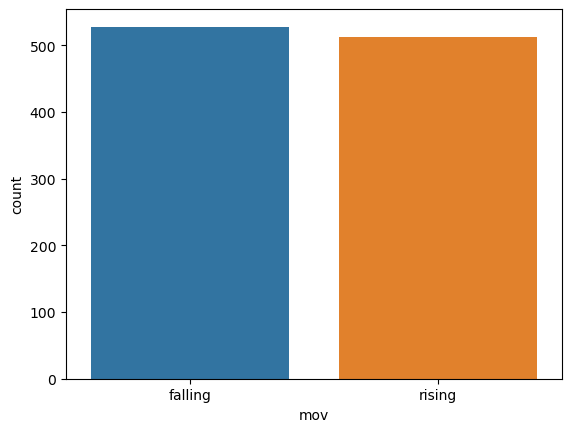

In [8]:
sns.countplot(x="mov", data=df)

In [9]:
df.isnull()

,Ax,Ay,Az,Gx,Gy,Gz,mov
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1036,False,False,False,False,False,False,False
1037,False,False,False,False,False,False,False
1038,False,False,False,False,False,False,False
1039,False,False,False,False,False,False,False


In [10]:
df.head(50)

,Ax,Ay,Az,Gx,Gy,Gz,mov
0,9.1154,1.6861,4.4428,0.21,2.17,-0.63,falling
1,9.0436,1.6693,4.3541,1.47,2.59,-0.28,falling
2,9.0125,1.6837,4.3062,0.56,-2.17,0.98,falling
3,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,falling
4,9.0891,1.6358,4.4547,3.78,-3.01,0.77,falling
5,9.0963,1.6310,4.1817,0.98,1.33,-0.42,falling
6,9.0939,1.7555,4.3518,0.07,1.89,0.49,falling
7,9.0053,1.6238,4.7829,-0.35,-0.84,0.63,falling
8,9.1083,1.6550,4.3805,0.63,-0.07,0.42,falling
9,9.0580,1.6574,4.3326,0.28,0.35,0.21,falling


In [11]:
#df.drop("status", axis=1, inplace=True)
#df.head()

In [12]:
# Replace the 'UP' and 'DOWN' values with NaN (a placeholder value for missing data)
df['mov'] = df['mov'].replace(['UP', 'DOWN'], np.nan)
# Remove rows with missing values
df = df.dropna()

df.head()


,Ax,Ay,Az,Gx,Gy,Gz,mov
0,9.1154,1.6861,4.4428,0.21,2.17,-0.63,falling
1,9.0436,1.6693,4.3541,1.47,2.59,-0.28,falling
2,9.0125,1.6837,4.3062,0.56,-2.17,0.98,falling
3,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,falling
4,9.0891,1.6358,4.4547,3.78,-3.01,0.77,falling


In [26]:
# Replace the 'falling' values with 0 and the 'rising' values with 1
df_copy = df.copy()
df_copy['mov'] = df_copy['mov'].replace(['falling', 'rising'], [0, 1])
df_copy.head(20)

# Save the modified dataset
#df.to_csv('modified_dataset.csv', index=False)

# Train Data

In [14]:
X= df_copy.drop("mov", axis=1)
y= df_copy["mov"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()

In [19]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.51      0.32      0.39       113\n           1       0.44      0.64      0.52        96\n\n    accuracy                           0.46       209\n   macro avg       0.47      0.48      0.46       209\nweighted avg       0.48      0.46      0.45       209\n'

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, predictions)

array([[36, 77],
       [35, 61]])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.46411483253588515